# __Marcos Barragán Corredera__

## Tarea Final ETL

### 01/02/2021

### CUNEF

# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## __1.- Inicializar y cargar el contexto spark__

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [3]:
import findspark 
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
from pyspark.sql import Row

# Para gráficos que vendrán después:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_file_1 = "./BDpracticafinalCSV.csv"
raw_data_1 = sc.textFile(data_file_1)
data_file_2 = "./BDpracticafinal2021.xlsx"
raw_data_2 = sc.textFile(data_file_2)

In [8]:
raw_data_1.take(8)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000',
 '5;RL;74;13830;Lvl;Gtl;5;1997;1998;None;TA;TA;928;Gd;Y;2;1;3;1;TA;6;2;482;TA;0;Sp;3;2010;189900',
 '6;RL;78;9978;Lvl;Gtl;6;1998;1998;BrkFace;TA;TA;926;Ex;Y;2;1;3;1;Gd;7;2;470;TA;0;Sp;6;2010;195500',
 '7;RL;41;4920;Lvl;Gtl;8;2001;2001;None;Gd;TA;1338;Ex;Y;2;0;2;1;G

Una vez que hemos cargado los datos y hemos visto visto cómo deberíamos llevar a cabo el parseado, lo que haré será eliminar la cabecera de los datos. Para ello, utilizando conceptos y funciones de RDD de PySpark:

In [9]:
cabecera = raw_data_1.first()
cabecera_paralellize = sc.parallelize([cabecera])
datos = raw_data_1.subtract(cabecera_paralellize)

Una vez hemos eliminado la cabecera, creo un rdd que solo contenga aquellas observaciones que vayamos utilizar a lo largo de la práctica, que son: `Zona`, `Año de construcción`, `Año de venta`, `Calidad de calefacción`, `Indicador de la vivienda`, `Número de cocinas`, `Número de garajes`, `Número de dormitorios`, pies$^{2}$ , `Precio`, `Superficie del sótano` y `tipo de revestimiento`:


In [10]:
datos_buenos = datos.\
  map(lambda x: x.split(';')).\
  map(lambda x: Row(
      indicador = (x[0]),
      Zona = (x[1]),
      pies2 = (x[3]),
      año_construccion = (x[7]),
      tipo_revestimiento = (x[9]),
      calidad_calefaccion = (x[13]),
      numero_habitaciones = (x[-12]),
      numero_cocina = (x[-11]),
      numero_garajes = (x[-8]),
      año_venta = (x[-2]),
      sup_sotano = (x[-17]),
      precio = (x[-1])
  ))

El orden de los datos es: 

+ 0: Zona

+ 1: Año construcción

+ 2: Año de venta

+ 3: calidad de la calefacción

+ 4: indicador del piso

+ 5: Números de cocinas

+ 6: Número de garajes

+ 7: Número de habitaciones

+ 8: pies$^{2}$

+ 9: Precio

+ 10: Tipo de revestimiento

Comprobamos si hay alguna columna que tenga valores nulos: 

In [11]:
datos_buenos.filter(lambda x: (x[0] == '' or x[1] == '' or x[2] == '' or x[3] == '' or x[4] == '' or x[5] == '' or x[6] == '' or x[7] == '' or x[8] == '' or x[9] == '' or x[10] == '' or x[11] == '')).collect()

[Row(Zona='RL', año_construccion='2007', año_venta='2007', calidad_calefaccion='Ex', indicador='1728', numero_cocina='1', numero_garajes='2', numero_habitaciones='3', pies2='15810', precio='181755', sup_sotano='768', tipo_revestimiento=''),
 Row(Zona='FV', año_construccion='2007', año_venta='2007', calidad_calefaccion='Ex', indicador='1800', numero_cocina='1', numero_garajes='3', numero_habitaciones='3', pies2='12217', precio='310013', sup_sotano='955', tipo_revestimiento=''),
 Row(Zona='FV', año_construccion='2006', año_venta='2007', calidad_calefaccion='Ex', indicador='1840', numero_cocina='1', numero_garajes='2', numero_habitaciones='2', pies2='5330', precio='207500', sup_sotano='1550', tipo_revestimiento=''),
 Row(Zona='RL', año_construccion='1957', año_venta='2007', calidad_calefaccion='TA', indicador='2230', numero_cocina='2', numero_garajes='2', numero_habitaciones='4', pies2='32668', precio='200624', sup_sotano='2035', tipo_revestimiento=''),
 Row(Zona='RL', año_construccion='2

Hay tan solo 24 columnas con valores nulos (''), de las cuales 23 pertenecen al tipo de revestimiento y solo 1 al número de garajes.

`Tipo de revestimiento` tiene muchos NA, por lo que, en un principio, decidí imputarlos por 'None' a todos aquellos nulos (pues es lo mismo que no tener información). Sin embargo, como en la cuestión que trata sobre esa columna solo nos preguntan sobre los revestimientos de ladrillo y piedra, no será necesario imputar aquellos '' por 'None'. Será posteriormente el filtro para escoger las de ladrillo y piedra el que solo nos va a tomar ese tipo de viviendas, por lo que es indiferente si dejamos el '' o si cambiamos por 'None', pues el filtro ignorará esas posiciones de cualquiera de las maneras.

El problema es número de garajes, que sí tiene nulos. Los imputaré por cero considerando que si no hay información es porque no hay garaje.

Más allá de esto, en la columna de Zona hay varios datos que vienen mal codificados. Esto es: algunos de los nombres de zona residencial baja densidad ("RL") vienen codificados como "Rl" o "rL", por lo que debemos cambiarlos para que coja esos valores como "RL" en el filtro. 

Para ello creo esta función:

In [12]:
def mayusculas(x):

  if x == 'Rl':
    x = 'RL'

  elif x == "rL":
    x = 'RL'
  
  elif x == 'RL':
    x

  return x

La función que elimina los NA que hemos encontrado es la siguiente:

In [13]:
def remove_nas(x):

  if x == '':

    return 0

  else:

    return int(x)

Aplicamos las funciones sobre aquellas variables que sabemos que contienen nulos (la de remove_nas) y sobre la columna de zona aplicamos la de transformar a RL aquellos rL y Rl.

Al mismo tiempo, transformaré aquellas variables que sean numéricas en tipo int o float (dependiendo de si son continuas o discretas) para trabajar más cómodamente con ellas:

In [14]:
datos_buenos = datos_buenos.map(lambda line: (mayusculas(line[0]), int(line[1]), int(line[2]), line[3], int(line[4]), int(line[5]), remove_nas(line[6]), int(line[7]), float(line[8]), float(line[9]), remove_nas(line[10]), line[11]))

Echamos un vistazo a lo que tenemos ahora:

In [15]:
datos_buenos.take(3)

[('RL', 1968, 2010, 'Ex', 4, 1, 2, 3, 11160.0, 244000.0, 2110, 'None'),
 ('RL', 1992, 2010, 'Ex', 8, 1, 2, 2, 5005.0, 191500.0, 1280, 'None'),
 ('RL', 1995, 2010, 'Ex', 9, 1, 2, 2, 5389.0, 236500.0, 1595, 'None')]

Filtramos las viviendas de barrios residenciales altos, medios y bajos. Esto es:

In [16]:
datos_buenos_2 = datos_buenos.filter(lambda x: (x[0] == "RL" or x[0] == "RH" or x[0] == "RM"))

##__2.- Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? ¿Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?__

Para saber el número de viviendas distintas presentes en el dataset, lo que debemos utilizar es la función _distinct_, que evalúa aquellos resultados que (como su nombre indica) son diferentes unos de otros. Si tras aplicar esta función aplicamos un _count_ obtendremos de vuelta el número de viviendas distintas presentes en el dataset. La variable que he utilizado para contabilizar si había o no repetidas es el indicador de las casas. 

De esta forma:

In [17]:
datos_buenos_2.map(lambda x: x[4]).distinct().count()

2762

Encontramos 2762 viviendas diferentes en el dataset. Para ver si alguna de ellas está repetida, lo que haré será ejecutar una resta del número de viviendas diferentes sobre el número de viviendas total, de manera que obtendré el número de ellas que aparecen duplicadas:

In [18]:
repetidos = datos_buenos_2.map(lambda x: (x[4]))
print("En el dataset de viviendas hay un total de:", 
      datos_buenos_2.count() - repetidos.distinct().count(), "viviendas repetidas")

En el dataset de viviendas hay un total de: 6 viviendas repetidas


Elimino estas observaciones duplicadas pues no van a aportar nada al trabajo. Lejos de ello, van a contribuir dos veces con los mismos resultados sobre los estudios llevados a cabo. Usando, de nuevo, el comando _distinct_ recupero los datos que no están duplicados. 

In [21]:
# Recupero el nombre de datos para seguir trabajando más cómodamente:

datos = datos_buenos_2.distinct()

Compruebo que está bien hecho:

In [20]:
repetidos = datos.map(lambda x: (x[4]))
print("En el dataset de viviendas hay un total de:", 
      datos.count() - repetidos.distinct().count(), "viviendas repetidas")

En el dataset de viviendas hay un total de: 0 viviendas repetidas


## __3.- ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?__

El número total de inmuebles lo sabemos de la cuestión anterior: un total de 2762 viviendas diferentes. Para saber el número de ellos que hay por cada zona de viviendas, lo que haré será tomar la primera posición de mi RDD (que es la zona de la vivienda) y hacer un agrupamiento a través de la cláusula _groupByValue_, que agrupa los resultados de objetos tipo clave - valor, devolviendo el número de ellos que hay de cada clave. De esta manera obtuve:

In [22]:
datos.map(lambda x: (x[0])).countByValue()

defaultdict(int, {'RH': 27, 'RL': 2273, 'RM': 462})

Como sabíamos desde un inicio (al observar la carga de los datos) la clase residencial más numerosa es la de "RL", después de la de "RM" y, por último, de las que menor número encontramos es "RH".

Nos preguntan también sobre el precio medio de las viviendas dentro de cada zona. Para ello, lo que haré será generarme un RDD con una tupla que contenga: (zona, precio), de manera que después, empleando un _combineByKey_, agrupar los resultados de precios con respecto a cada zona y calcular la media para cada una de ellas de forma agrupada. Esto es: 

In [55]:
precio_medio_zona = datos.map(lambda x: (x[0], float(x[9]))).\
                          combineByKey(
                                      (lambda x: (x, 1)), 
                                      (lambda x1, y1: (x1[0] + y1, x1[1] + 1)), 
                                      (lambda x2, y2: (x2[0] + y2[0], x2[1] + y2[1])) 
                                      ).\
                          map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).\
                          sortBy(lambda y: y[0]).collect()
precio_medio_zona

[('RH', 136419.78), ('RL', 191283.25), ('RM', 126781.39)]

Las viviendas ubicadas en zonas residenciales de baja densidad ("RL") son las más caras (en media), seguidas por laas de alta densidad, que son ligeramente más caras que las de zona residencial de densidad media.

## __4.- Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built.__

Nos piden que calculemos la superficie de los sótanos de las viviendas para las diferentes décadas de construcción de las mismas. Como lo que tenemos son años de construcción, debemos crear una función que calcule las décadas en las que se incluye cada fecha. En mi caso, consideraré que los años acabados en 0 pertenecen a la década anterior. Es decir, la década de 1880-1890 incluye el 1890 pero no el 1880, sino del 81 en adelante. Es necesario hacerlo tan explícito porque hay dos siglos y debemos diferenciar los 10 y 20 para los 1900 y los 2000, así como los 70, 80, 90 para 1800 y 1900.

De esta manera:

In [53]:
def decadas (x):
  if x <= 1880:
    return ("1870-1880")
  elif x <= 1890:
    return ("1880-1890")
  elif x <= 1900 :
    return ("1890-1900")
  elif x <= 1910 :
    return ("1900-1910")
  elif x <= 1920 :
    return ("1910-1920")
  elif x <= 1930 :
    return ("1920-1930")
  elif x <= 1940 :
    return ("1930-1940")
  elif x <= 1950 :
    return ("1940-1950")
  elif x <= 1960 :
    return ("1950-1960")
  elif x <= 1970 :
    return ("1960-1970")
  elif x <= 1980 :
    return ("1970-1980")
  elif x <= 1990 :
    return ("1980-1990")
  elif x <= 2000 :
    return ("1990-2000")
  else:
    return ("2000-2010")

Quizá una forma más cómoda de implementar las décadas hubiese sido a través de esta función, que toma los 3 primeros dígitos de los años (recordemos que al haber 3 siglos involucrados no vale solo con las dos últimas pues hay que diferenciar 1880 de 1980 y 1910 de 2010, por ejemplo) y les añade un 0 al final para obtener la década:

In [50]:
def decadas_2(x):

  # El año viene codificado como 19XX, 18XX, 20XX, po lo que nos interesan los 3 últimos dígitos

  return (x[:3] + "0 's")

No obstante, esta función da problemas a la hora de trabajar con números enteros, por lo que como una de las primeras acciones de la práctica fue cambiar a entero el año (entre otros), aplicaré la primera función que había definido, pues es más cómoda e intuitiva de interpretar.

Aplico la función sobre la columna de años y creo un RDD que contenga una tupla consistente en: (década, superficie del sótano) para cada vivienda. 

Una vez generado este elemento, lo que haré será, como en el apartado anterior, un _combineByKey_ que me devuelva la suma de los valores de las superficies así como el número de veces que aparecen viviendas por cada década en el RDD original. Con ello, simplemente tengo que dividir para obtener la media por cada década. 

Esto es:

In [54]:
por_decadas = datos.map(lambda x: (decadas(int(x[1])), float(x[10])))

media_por_decada = por_decadas.combineByKey(
                                            (lambda x: (x, 1)), 
                                            (lambda x1, y1: (x1[0] + y1, x1[1] + 1)), 
                                            (lambda x2, y2: (x2[0] + y2[0], x2[1] + y2[1])) 
                                            ).\
                                            map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).\
                                            sortBy(lambda y: y[0]).collect()

media_por_decada

[('1870-1880', 829.62),
 ('1880-1890', 803.8),
 ('1890-1900', 763.16),
 ('1900-1910', 726.43),
 ('1910-1920', 807.33),
 ('1920-1930', 832.87),
 ('1930-1940', 779.99),
 ('1940-1950', 709.59),
 ('1950-1960', 1010.12),
 ('1960-1970', 1052.76),
 ('1970-1980', 958.13),
 ('1980-1990', 1156.46),
 ('1990-2000', 1130.44),
 ('2000-2010', 1361.67)]

Como vemos, la década del 2000 al 2010 la superficie de los sótanos es claramente mayor, en media, que en el resto de décadas. El menor valor lo obtenemos para dicha década un siglo antes (1900-1910). 

## __5.- ¿Cuál es la década de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?__

Para responder a esta pregunta, se me ocurrieron 3 formas de aborarlo:

- La primera fue considerar únicamente aquellas viviendas con cualidades de calefacción "Ex" o "Gd" (es decir, excelente o buena), de manera que al contar el número de veces que aparecen estos valores por décadas, tendremos una estimación de en qué décadas se construyeron más viviendas con un mejor acondicionamiento. Para esto simplemente hay que filtrar, generar un RDD con una tupla clave - valor como: (década, viviendas con calefaccion excelente o buena) e implementar un _countByKey_ que nos cuente el número de veces que aparecen viviendas de ese tipo por década.

- La segunda fue hacer un _countByValue_ de toda la columna con información sobre la calefacción para ver reflejadas el número de veces que aparece cierto tipo de calefacción. Lo bueno que tiene esta opción es que refleja todos los tipos de calefacción, pero el inconveniente es que contiene demasiada información como para ser cómodo su uso. 

- La tercera fue filtrar por décadas, creando un RDD que contuviese (década, tipo de calefacción) y hacer un _countByValue_ que devuelva el número de casos de cada tipo de calefacción por cada década por separado. Lo bueno que tiene es que es bastante intuitivo y los resultados son cómodos de leer. El inconveniente, es que es un poco laborioso de generar para todas las décadas.

En cualquier caso, usando la que use, los resultados generados son los mismos.

+ Opción 1: filtro excelentes y buenas:

In [ ]:
calefaccion_mejor = datos.filter(lambda x: (x[3] == 'Ex' or x[3] == 'Gd')).\
                          map(lambda x: (decadas(int(x[1])), x[3])).countByKey()

calefaccion_mejor

defaultdict(int,
            {'1870-1880': 3,
             '1880-1890': 8,
             '1890-1900': 20,
             '1900-1910': 30,
             '1910-1920': 72,
             '1920-1930': 79,
             '1930-1940': 73,
             '1940-1950': 77,
             '1950-1960': 170,
             '1960-1970': 166,
             '1970-1980': 99,
             '1980-1990': 72,
             '1990-2000': 324,
             '2000-2010': 629})

Como cabía esperar, las viviendas mejor preparadas para el frío son aquellas construidas entre 2000 y 2010, pues son casas más modernas, con nuevos materiales de revestimiento y nuevos tipos de calefacción incorporados a las mismas. 

Las que menos preparadas estarían serían las de antes de 1900, pero no son resultados muy objetivos, puesto que el número de viviendas de esas décadas en comparación con el número de ellas de las décadas de 1980 en adelante que aparecen en el dataset es mucho menor.

Si, por el contrario, calculamos las viviendas peor acondicionadas para la calefacción, obtendremos que en las décadas de los 40, los 50 y los 70 se hicieron varias casas con un acondicionamiento pobre. 

In [ ]:
calefaccion_peor = datos.filter(lambda x: (x[3] == 'Fa' or x[3] == 'Po')).\
                         map(lambda x: (decadas(int(x[1])), x[3])).countByKey()

calefaccion_peor

defaultdict(int,
            {'1870-1880': 1,
             '1890-1900': 1,
             '1900-1910': 4,
             '1910-1920': 9,
             '1920-1930': 18,
             '1930-1940': 5,
             '1940-1950': 14,
             '1950-1960': 17,
             '1960-1970': 10,
             '1970-1980': 11})

+ Opción 2: todos juntos "a capón"

In [ ]:
calefaccion = datos.map(lambda x: (decadas(int(x[1])), x[3]))

calefaccion.countByValue()

defaultdict(int,
            {('1870-1880', 'Ex'): 2,
             ('1870-1880', 'Fa'): 1,
             ('1870-1880', 'Gd'): 1,
             ('1870-1880', 'TA'): 4,
             ('1880-1890', 'Ex'): 2,
             ('1880-1890', 'Gd'): 6,
             ('1880-1890', 'TA'): 2,
             ('1890-1900', 'Ex'): 11,
             ('1890-1900', 'Fa'): 1,
             ('1890-1900', 'Gd'): 9,
             ('1890-1900', 'TA'): 10,
             ('1900-1910', 'Ex'): 13,
             ('1900-1910', 'Fa'): 4,
             ('1900-1910', 'Gd'): 17,
             ('1900-1910', 'TA'): 15,
             ('1910-1920', 'Ex'): 43,
             ('1910-1920', 'Fa'): 9,
             ('1910-1920', 'Gd'): 29,
             ('1910-1920', 'TA'): 35,
             ('1920-1930', 'Ex'): 47,
             ('1920-1930', 'Fa'): 17,
             ('1920-1930', 'Gd'): 32,
             ('1920-1930', 'Po'): 1,
             ('1920-1930', 'TA'): 66,
             ('1930-1940', 'Ex'): 46,
             ('1930-1940', 'Fa'): 5,
        

De nuevo obtenemos que las que mejor preparadas están son las viviendas de las décadas del 2000 en adelante.

+ Opción 3: filtrando por décadas

In [ ]:
print("En la década de los 2000, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '2000-2010').map(lambda x: (x[3])).countByValue())
print("En la década de los 1990, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1990-2000').map(lambda x: (x[3])).countByValue())
print("En la década de los 1980, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1980-1990').map(lambda x: (x[3])).countByValue())
print("En la década de los 1970, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1970-1980').map(lambda x: (x[3])).countByValue())
print("En la década de los 1960, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1960-1970').map(lambda x: (x[3])).countByValue())
print("En la década de los 1950, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1950-1960').map(lambda x: (x[3])).countByValue())
print("En la década de los 1940, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1940-1950').map(lambda x: (x[3])).countByValue())
print("En la década de los 1930, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1930-1940').map(lambda x: (x[3])).countByValue())
print("En la década de los 1920, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1920-1930').map(lambda x: (x[3])).countByValue())
print("En la década de los 1910, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1910-1920').map(lambda x: (x[3])).countByValue())
print("En la década de los 1900, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1900-1910').map(lambda x: (x[3])).countByValue())
print("En la década de los 1890, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1890-1900').map(lambda x: (x[3])).countByValue())
print("En la década de los 1880, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1880-1890').map(lambda x: (x[3])).countByValue())
print("En la década de los 1870, la calidad de calefacción era:", datos.filter(lambda x: decadas(x[1]) == '1870-1880').map(lambda x: (x[3])).countByValue())

En la década de los 2000, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 604, 'Gd': 25})
En la década de los 1990, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 262, 'Gd': 62, 'TA': 6})
En la década de los 1980, la calidad de calefacción era: defaultdict(<class 'int'>, {'Gd': 40, 'TA': 40, 'Ex': 32})
En la década de los 1970, la calidad de calefacción era: defaultdict(<class 'int'>, {'TA': 239, 'Ex': 59, 'Fa': 11, 'Gd': 40})
En la década de los 1960, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 90, 'TA': 186, 'Fa': 10, 'Gd': 76})
En la década de los 1950, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 99, 'Fa': 17, 'TA': 147, 'Gd': 71})
En la década de los 1940, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 48, 'TA': 60, 'Fa': 13, 'Gd': 29, 'Po': 1})
En la década de los 1930, la calidad de calefacción era: defaultdict(<class 'int'>, {'Ex': 46, 'Gd': 27, 'TA': 40, 'Fa': 5})
En la década de los 

Siempre es mejor una imagen para aclarar las cosas, por lo que llevaré a cabo una representación del estado de la calefacción de las viviendas en función de las diferentes décadas de construcción de las mismas. 

Efectivamente corroboramos que en las dos últimas décadas aumenta exponencialmente el número de casas con acondicionamiento excelente de la calefacción.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


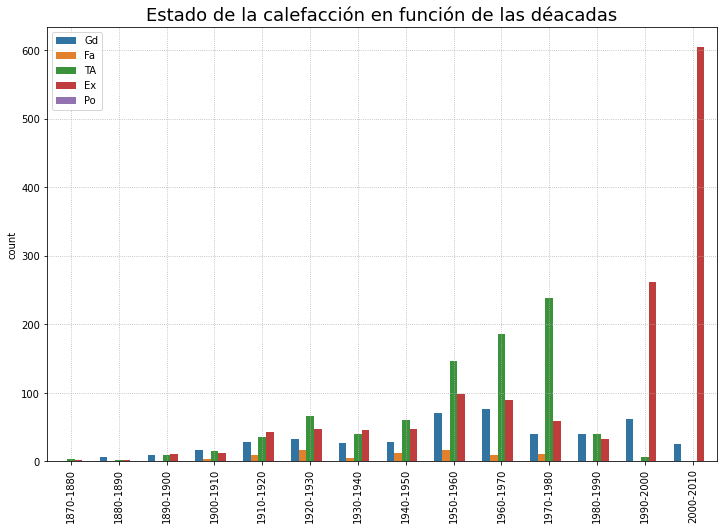

In [ ]:
calefaccion_sns = datos.map(lambda x: (decadas(int(x[1])), x[3])).sortBy(lambda x: x[0])

plt.figure(figsize = (12, 8))

sns.countplot(calefaccion_sns.map(lambda x: x[0]).collect(), hue = calefaccion_sns.map(lambda x: x[1]).collect())
plt.xticks(rotation = 90)
plt.legend(loc = "upper left")
plt.grid(ls = ":")
plt.title("Estado de la calefacción en función de las déacadas", size = 18);

La diferencia entre los tipos de calefacción es clara. Las viviendas de dos últimas décadas están claramente mejor preparadas para el frío que aquellas de años anteriores.

No obstante, se aprecia que en las décadas de 1940 hasta 1990 el servicio de calefacción no primaba como una característica importante como parece serlo en las últimas décadas, ya que la mayor parte de las viviendas presentan un servicio medio ("TA") de calefacción. Esto puede deberse también a que antes no era tan sencillo acondicionar una vivienda contra el frío, pues más allá del recubrimiento exterior, la mayor parte de las viviendas de esa época solían calentarse a través de chimeneas o estufas de combustión (probablemente canalizadas desde el sótano). Desde este punto de vista es fácil entender la calidad de "normal" o incluso de _"fair"_ en las condiciones de calefacción. De hecho, aquellas de estas épocas catalogadas como excelentes probablemente sea porque hayan sido reacondicionadas años posteriores a su edificación.

## __6.- ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?__

Para contestar a esta pregunta, lo primero que debemos hacer es calcular los metros cuadrados de las viviendas que aparecen en el dataset. La superficie de las mismas viene estimada en pies cuadrados, por lo que para conocer el precio  del metro cuadrado, deberemos aplicar el siguiente factor de conversión:

1 $m^{2}$ = 10.764 pie$^{2}$ $<=>$ 1 pie$^{2}$ = 0.093 m$^{2}$ 

Una vez transformado a metros cuadrados, dividiendo la columna de precio entre la de metros cuadrados obtendremos el precio por metro cuadrado de las viviendas. Para contestar correctamente a la pregunta, previamente a lo comentado debo filtrar la columna de año de venta para el año 2009. Después, cogiendo el valor del indicador, las columnas del precio y los metros cuadrados, crearé un RDD que contenga una tupla con dicho indicador, metros cuadrados y precios para el año 2009, en la forma (indicador, (precio, m$^{2}$)). Dividiendo los elementos de la segunda componente de la tupla obtendremos el precio por metro cuadrado para cada indicador. Posteriormente, ordenándolos de mayor a menor, tomando los 10 primeros habremos obtenido las 10 viviendas vendidas con un mayor ratio de precio$/m^{2}$.

In [ ]:
datos.filter(lambda x: x[2] == 2009).\
      map(lambda x: (x[4],((float(x[8])*0.093), float(x[9])))).\
      map(lambda x: (x[0], round(float(x[1][1]/x[1][0]),3))).\
      sortBy(lambda x: x[1], False).take(10)

[(936, 1025.641),
 (934, 989.999),
 (464, 820.201),
 (935, 807.119),
 (408, 764.849),
 (407, 755.248),
 (405, 716.846),
 (933, 713.537),
 (403, 710.445),
 (411, 700.34)]

La vivienda con el precio por metro cuadrado más caro del año 2009 se corresponde con el indicador 936, que presenta las características siguientes:

In [62]:
datos.filter(lambda x: x[4] == 936).collect()

[('RM', 1980, 2009, 'TA', 936, 1, 2, 2, 1300.0, 124000.0, 561, 'None')]

Bastante sorprendente el resultado, pues la casa es de 1980, se encuentra en un barrio residencial de densidad media, calefacción normal, 1 cocina, 2 garajes y 2 dormitorios, 1300 pies$^{2}$ (121 m$^{2}$), 124k $ y sin revestimiento. 

## __7.- Media anual por zonas del precio de venta y metros cuadrados.__

Esta pregunta se puede intepretar de varias formas. En mi caso, consideraré que pregunta por la media del precio de venta y la media de los $m^{2}$, por separado, para cada año y cada zona. Es decir, cogeré dos tuplas:

+ Una tupla que contenga la zona, el año de venta y el precio de venta, agrupadas en la forma: ((`Zona`, `Año de venta`), `Precio`).

+ Otra tupla que contenga la zona, el año de venta y los metros cuadrados de las viviendas, agrupadas en la forma: ((`Zona`, `Año de venta`), $m^{2}$).

Una vez agrupadas de esa manera, generaré un _combineByKey_ y calcularé las medias por año y por zonas para los precios y los $m^{2}$ por separado.

Los resultados los ordenaré por años:

In [63]:
# Genero los dos RDD como las tuplas dichas:

precios = datos.map(lambda x: ((x[0], x[2]), x[9]))

m2 = datos.map(lambda x: ((x[0], x[2]), x[8]*0.093)) 

a) Precios:

In [64]:
precios_media = precios.combineByKey(
                                    (lambda x: (x, 1)), 
                                    (lambda x1, y1: (x1[0] + y1, x1[1] + 1)), 
                                    (lambda x2, y2: (x2[0] + y2[0], x2[1] + y2[1])) 
                                    ).\
                                    map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).\
                                    sortBy(lambda y: y[0][1]).collect()
precios_media

[(('RL', 2006), 194350.64),
 (('RH', 2006), 140316.67),
 (('RM', 2006), 127502.64),
 (('RM', 2007), 128947.62),
 (('RH', 2007), 147250.0),
 (('RL', 2007), 193399.98),
 (('RH', 2008), 150333.33),
 (('RM', 2008), 133336.12),
 (('RL', 2008), 189885.59),
 (('RL', 2009), 190455.55),
 (('RM', 2009), 118759.87),
 (('RH', 2009), 116206.8),
 (('RL', 2010), 184978.42),
 (('RH', 2010), 126280.0),
 (('RM', 2010), 119681.71)]

b) m$^{2}$:

In [78]:
year_m2 = m2.combineByKey(
                          (lambda x: (x, 1)), 
                          (lambda x1, y1: (x1[0] + y1, x1[1] + 1)), 
                          (lambda x2, y2: (x2[0] + y2[0], x2[1] + y2[1])) 
                          ).\
                          map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).\
                          sortBy(lambda y: y[0][1])

year_m2.collect()

[(('RL', 2006), 1044.88),
 (('RH', 2006), 660.25),
 (('RM', 2006), 575.61),
 (('RM', 2007), 626.1),
 (('RH', 2007), 652.0),
 (('RL', 2007), 1060.78),
 (('RH', 2008), 766.94),
 (('RM', 2008), 624.32),
 (('RL', 2008), 1048.75),
 (('RL', 2009), 1003.23),
 (('RM', 2009), 553.13),
 (('RH', 2009), 647.82),
 (('RL', 2010), 1012.42),
 (('RH', 2010), 753.82),
 (('RM', 2010), 586.72)]

c) Los dos juntos: precio por metro cuadrado por año de venta y zona residencial:

In [79]:
precio_por_m2 = datos.map(lambda x: ((x[0], x[2]), x[9]/(x[8]*0.093)))

precio_m2_year = precio_por_m2.combineByKey(
                                            (lambda x: (x, 1)), 
                                            (lambda x1, y1: (x1[0] + y1, x1[1] + 1)), 
                                            (lambda x2, y2: (x2[0] + y2[0], x2[1] + y2[1])) 
                                            ).\
                                            map(lambda x: (x[0], round(x[1][0]/x[1][1], 2))).\
                                            sortBy(lambda y: y[0][1])

precio_m2_year.collect()

[(('RL', 2006), 210.41),
 (('RH', 2006), 232.04),
 (('RM', 2006), 302.62),
 (('RM', 2007), 261.89),
 (('RH', 2007), 247.42),
 (('RL', 2007), 210.19),
 (('RH', 2008), 255.73),
 (('RM', 2008), 272.41),
 (('RL', 2008), 207.17),
 (('RL', 2009), 215.19),
 (('RM', 2009), 303.55),
 (('RH', 2009), 203.57),
 (('RL', 2010), 205.3),
 (('RH', 2010), 190.44),
 (('RM', 2010), 266.93)]

## __8.- ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?__

En esta pregunta entiendo como total de recaudación la suma de los precios de las viviendas en venta. De esta forma, este total lo calcularé filtrando en primer lugar por las viviendas de ladrillo (tanto normal como visto), y en segundo lugar haciendo lo propio con las de piedra. Una vez hecho el filtro, simplemente habrá que tomar la columna del precio de venta de la casa y calcular la suma para ambos RDD, así como la media de ambas (ya que queremos comparar, y de ladrillo hay casi 900 viviendas, mientras que de piedra hay menas de 300, por lo que las comparaciones no serían "justas" en absoluto).

Una vez calculada las medias de ambos casos (piedra y ladrillo), podremos compararlas entre ellas. Para saber si la diferencia es grande o "significativa" consideraré representar unos _boxplot_ para comparar sus estadísticos principales y saber si son apreciablemente diferentes los precios de viviendas de ladrillo y piedra.

In [81]:
ladrillo = datos.filter(lambda x: x[11] == 'BrkCmn' or x[11] == 'BrkFace').map(lambda x: (float(x[9])))

print("El total de recaudación de las casas de revestimiento de ladrillo es de: ", ladrillo.sum(), "$.")

media_ladrillo = round(ladrillo.sum()/ladrillo.count(),2)

El total de recaudación de las casas de revestimiento de ladrillo es de:  182417536.0 $.


In [82]:
piedra = datos.filter(lambda x: x[11] == 'Stone').map(lambda x: (float(x[9])))

print("El total de recaudación de las casas de revestimiento de ladrillo es de: ", piedra.sum(), "$")

media_piedra = round(piedra.sum()/piedra.count(),2)

El total de recaudación de las casas de revestimiento de ladrillo es de:  60175477.0 $


La diferencia de los precios, en media, de las viviendas con revestimientos de ladrillo frente a las de piedra la podemos calcular como:

In [83]:
print("El ratio de precios, en media, de las casas de ladrillo frente las de piedra es de:", media_ladrillo/media_piedra)

El ratio de precios, en media, de las casas de ladrillo frente las de piedra es de: 0.7951851661997844


Las casas de ladrillo valen, aproximadamente, un 20% menos (en media) que lo que cuestan las casas de piedra. 

Para asegurarnos de este resultado, implementaré un boxplot con los resultados de los precios de las viviendas de ladrillo y las viviendas de piedra. Entonces se apreciará cuáles son las distribuciones de precio reales de cada una de ellas.

In [ ]:
ladrillo_plot = ladrillo.collect()

piedra_plot = piedra.collect()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


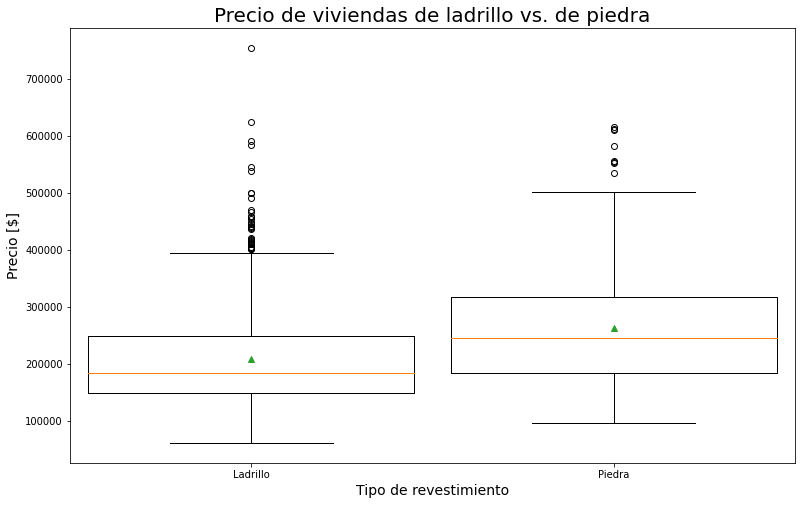

In [ ]:
plt.figure(figsize = (13,8))

plt.boxplot([ladrillo_plot, piedra_plot], widths = 0.9, showmeans = True)
plt.xticks([1,2], ('Ladrillo', 'Piedra'))
plt.title('Precio de viviendas de ladrillo vs. de piedra', size = 20)
plt.xlabel('Tipo de revestimiento', size = 14)
plt.ylabel('Precio [$]', size = 14);

Como vemos, es evidente que las casas con un revestimiento de piedra son más caras que las que presentan un revestimiento de ladrillo. El ratio de las medias no era demasiado esclarecedor, pero en este boxplot vemos como el primer cuartil de las casas de piedra coincide con la mediana de las casas de ladrillo, así como la mediana de las casas de piedra coincide con el 3er cuartil de las de ladrillo. Por tanto, podemos concluir que las casas con revestimiento de piedra son significativamente más caras que las que presentan revestimiento de ladrillo (por lo menos para los barrios residenciales que estábamos considerando).

Una forma complementaria de averiguar si los precios de las viviendas de ladrillo son realmente más baratas que las de piedra es estudiar la distribución de sus precios a través de unos histogramas. Si superponemos los dos histogramas podremos comparar sus distribuciones, siempre y cuando explicitemos que queremos representar histogramas de densidad (no absolutos).


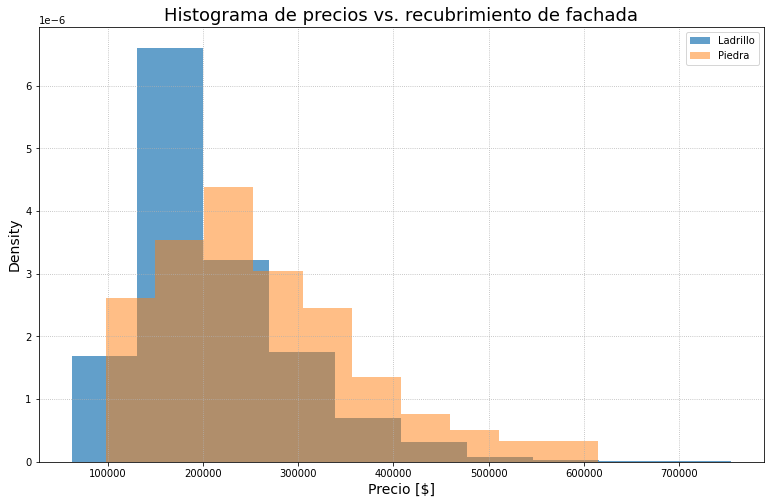

In [ ]:
plt.figure(figsize = (13,8))

plt.hist(ladrillo_plot, density = True, alpha = 0.7, label = 'Ladrillo')
plt.hist(piedra_plot, density = True, alpha = 0.5, label = 'Piedra')
plt.grid(ls = ':')
plt.title('Histograma de precios vs. recubrimiento de fachada', size = 18)
plt.ylabel('Density', size = 14)
plt.xlabel('Precio [$]', size = 14)
plt.legend();

En el histograma comprobamos como, efectivamente, los precios de las casas de piedra están desplazados hacia la derecha; es decir, hacia posiciones de precios mayores, en contraste con las de ladrillo, que se agrupan en su mayoría en precios menores.

## __9.-¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos.__

Para comparar los precios de las viviendas con 2 cocinas y 2 o más plazas de garaje frente a las que solo presentan una de cada, debemos crear dos RDD nuevos: 

+ Uno aplicando el filtro de 1 cocina y 1 plaza de garaje, creando un RDD que contenga los precios para esas viviendas,

+ Otro aplicando el filtro de 2 cocinas y 2 ó más plazas de garaje, creando otro RDD que contenga los precios de dichas viviendas.

Después, para poder compararlas, habrá que calcular las medias para cada tipo de viviendas. Al hacer esto, obtendré:

+ Para las de dos o más cocinas y garajes:

In [ ]:
dos_o_mas = datos.filter(lambda x: (x[5] == 2 and x[6] >= 2)).\
                  map(lambda x: (float(x[9])))

media_dos_o_mas = round(dos_o_mas.sum()/dos_o_mas.count(),2)

+ Para las de una cocina y una plaza de garaje:

In [ ]:
una = datos_buenos.filter(lambda x: (x[5] == 1 and x[6] == 1)).\
                   map(lambda x: float(x[9]))

media_una = round(una.sum()/una.count(), 2)

Calculamos el ratio de medias para comparar:

In [ ]:
print("El ratio de las medias de las viviendas con 1 cocina y 1 plaza de garaje frente a las de 2 cocinas y plazas de garaje es de:", round(media_una/media_dos_o_mas, 2))

El ratio de las medias de las viviendas con 1 cocina y 1 plaza de garaje frente a las de 2 cocinas y plazas de garaje es de: 0.88


Los pisos con dos cocinas y dos o más plazas de garaje son, en media, un 12% más caras que las que solo contienen una cocina y una plaza de garaje.

De la misma forma que antes, voy a estudiar la distribución de los estadísticos principales de las viviendas con 2 cocinas y 2 o más plazas de garaje frente a los de las de 1 cocina y 1 garaje. Esto es: 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


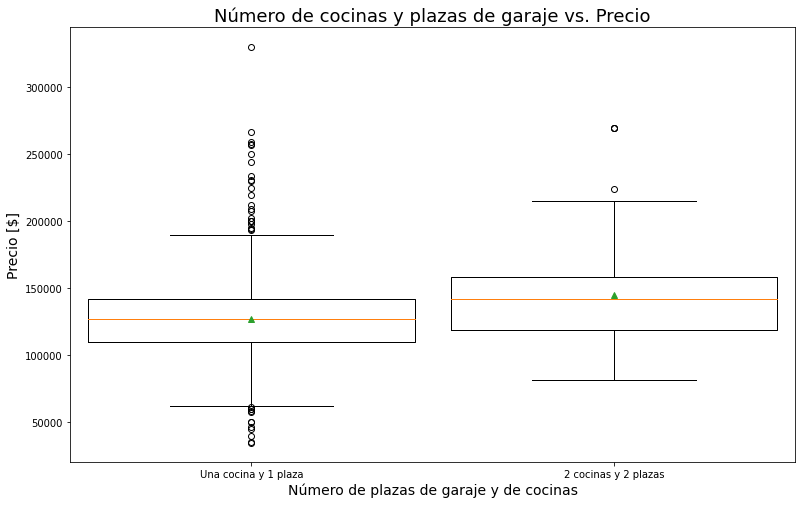

In [ ]:
plt.figure(figsize = (13,8))

plt.boxplot([una.collect(), dos_o_mas.collect()], widths = 0.9, showmeans = True)
plt.xticks([1,2], ['Una cocina y 1 plaza', '2 cocinas y 2 plazas'])
plt.xlabel('Número de plazas de garaje y de cocinas', size = 14)
plt.ylabel('Precio [$]', size = 14)
plt.title('Número de cocinas y plazas de garaje vs. Precio', size = 18);

Con este gráfico ratificamos que parece existir una diferencia de precio con respecto al número de cocinas y de plazas de garaje (aunque no tanto como en un principio podríamos suponer). Se aprecia que la mediana de los precios de las casas con 2 cocinas y 2 o más plazas de garaje coincide con el tercer cuartil de aquellas casas con 1 cocina y 1 plaza. 

También vemos que aparece un número elevado de "outliers" en el precio de las casas con una cocina y una plaza de garaje, lo cual hace que los resultados de los estadísticos no puedan ser tomados como totalmente fiables.

Si observamos, como en el caso anterior, la distribución del precio de las viviendas para ambos casos (en un histograma de densidad), veremos como ambas distribuciones se solapan bastante hasta el punto de los 18k-20k $, valor a partir del cual predominan las viviendas con 2 cocinas y plazas de garaje. 

Por tanto, aunque la diferencia no es tan evidente como antes, podemos establecer que sí hay una diferencia en el precio en función del número de cocinas y plazas de garaje. 

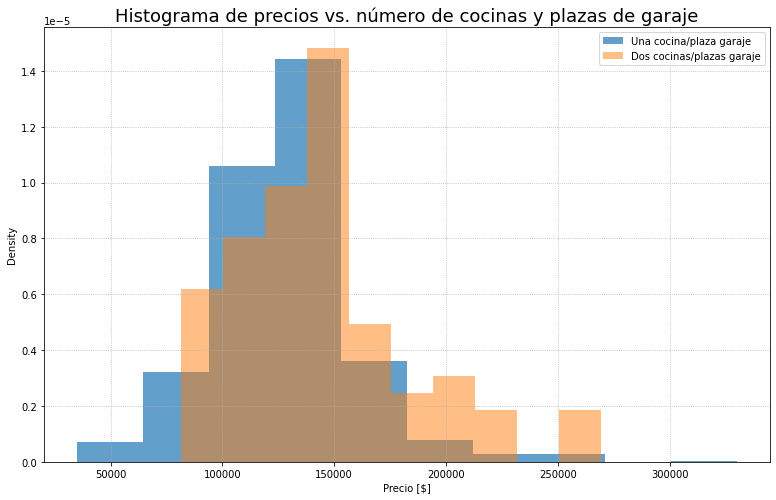

In [ ]:
plt.figure(figsize = (13,8))

plt.hist(una.collect(), density = True, alpha = 0.7, label = 'Una cocina/plaza garaje')
plt.hist(dos_o_mas.collect(), density = True, alpha = 0.5, label = 'Dos cocinas/plazas garaje')
plt.legend()
plt.grid(ls = ':')
plt.title("Histograma de precios vs. número de cocinas y plazas de garaje", size = 18)
plt.xlabel("Precio [$]")
plt.ylabel('Density');

Cabe preguntarse por qué el número de plazas de garaje y cocinas no afecta de una forma tan apreciable como a priori cabía esperar. Por eso decidí estudiar por separado cómo afectan el número de cocinas y de garajes por separado. En particular, estudiaré la distribución de los precios para viviendas con 1, 2 y 3+ plazas de garaje, y para 1 y 2+ cocinas. El resultado es el siguiente:

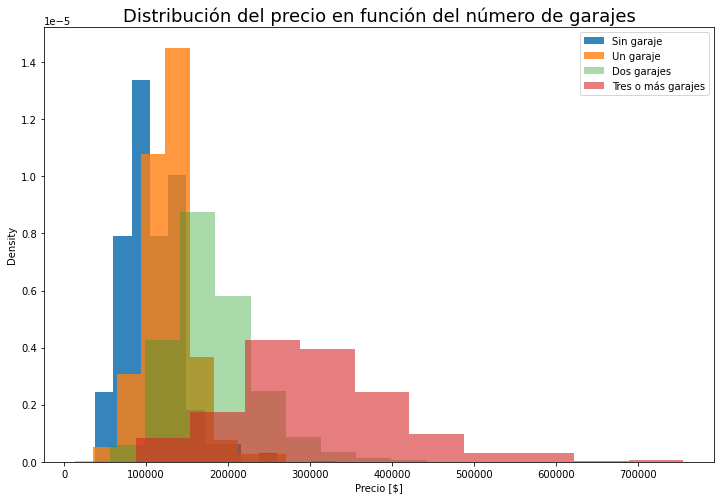

In [111]:
plt.figure(figsize = (12, 8))

plt.hist(datos.filter(lambda x: (x[6] == 0)).map(lambda x: x[9]).collect(), density = True, alpha = 0.9, label = "Sin garaje") 
plt.hist(datos.filter(lambda x: (x[6] == 1)).map(lambda x: x[9]).collect(), density = True, alpha = 0.8, label = "Un garaje") 
plt.hist(datos.filter(lambda x: (x[6] == 2)).map(lambda x: x[9]).collect(), density = True, alpha = 0.4, label = "Dos garajes")
plt.hist(datos.filter(lambda x: (x[6] >= 3)).map(lambda x: x[9]).collect(), density = True, alpha = 0.6, label = "Tres o más garajes")
plt.title('Distribución del precio en función del número de garajes', size = 18)
plt.xlabel('Precio [$]')
plt.ylabel('Density')
plt.legend();

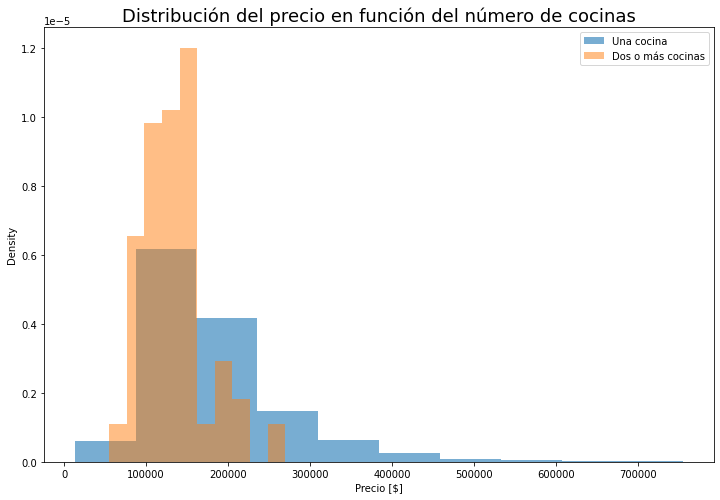

In [112]:
plt.figure(figsize = (12, 8))

plt.hist(datos.filter(lambda x: (x[5] == 1)).map(lambda x: x[9]).collect(), density = True, alpha = 0.6, label = "Una cocina") 
plt.hist(datos.filter(lambda x: (x[5] >= 2)).map(lambda x: x[9]).collect(), density = True, alpha = 0.5, label = "Dos o más cocinas")
plt.title('Distribución del precio en función del número de cocinas', size = 18)
plt.xlabel('Precio [$]')
plt.ylabel('Density')
plt.legend();

Como vemos, el número de garajes afecta al precio de una forma evidente: cuanto mayor es el número de garajes, la distribución de los precios se mueve más hacia la derecha del gráfico. Esto es, a medida que aumenta el número de plazas de garaje, aumenta el precio del inmueble.

Todo lo contrario ocurre con las cocinas. Vemos en el gráfico que el número de cocinas no parece afectar en absoluto al precio, pues hay viviendas con una cocina mucho más caras que aquellas con un número mayor de cocinas. De hecho, el máximo de distribución se acumula en torno a los 100-150k $ para las de 2+ cocinas, siendo mucho más ensanchada la distribución para las viviendas de una sola cocina. 

Esto es lo que provoca el resultado de antes: la relación cocina + garaje vs. precios no está tan clara como cabría esperar porque mientras que las plazas de garaje contribuyen en gran medida a aumentar el precio, el número de cocinas no participa de esa forma. No obstante, en compendio, el efecto de los garajes hace que los precios aumenten para el filtro cocina+garaje en conjunto, aunque de forma mucho menos notable.

## __Complementaria 1.- Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes).__

Esto ya se ha visto en segundo gráfico anterior, donde se veía que la distribución de los precios aumentaba a medida que aumenta el número de plazas de garaje por vivienda. 

Para estudiar de otra forma si influye el número de garajes en el precio de la vivienda, lo que haré será estudiar los principales estadísticos del precio para cada valor del número de garajes. Si realmente hay una diferencia de precios, entonces saldrá reflejado en la mediana y los cuartiles de los boxplot que implementaré.

En primer lugar haré un _scatterplot_ para observar si, a priori, podemos establecer una dependencia entre ambas variables. Esto es:

In [ ]:
precio_garajes = datos.map(lambda x: (x[6], x[9]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


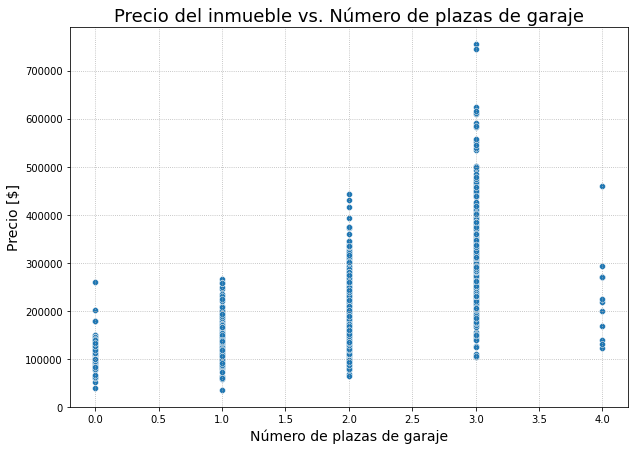

In [ ]:
plt.figure(figsize = (10, 7))

sns.scatterplot(precio_garajes.map(lambda x: x[0]).collect(), precio_garajes.map(lambda x: x[1]).collect())
plt.title('Precio del inmueble vs. Número de plazas de garaje', size = 18)
plt.xlabel('Número de plazas de garaje', size = 14)
plt.grid(ls = ':')
plt.ylabel('Precio [$]', size = 14);

Parece que el precio va en aumento a medida que aumenta el número de plazas de garaje hasta que llegamos al valor de 4 plazas de garaje, valor a partir del cual se aprecia una disminución del mismo. Es cierto que no podemos tomarla como un resultado "significativo" pues el número de observaciones con 4 plazas de garaje es bastante pequeño en comparación con el resto de datos que tenemos del resto de número de plazas de garaje, pero los que hay no parecen esclarecer que el precio vaya a aumentar.

Al implementar los diagramas _boxplot_ para observar cómo se distribuyen los estadísticos del precio vs. las plazas de garaje, obtendremos:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


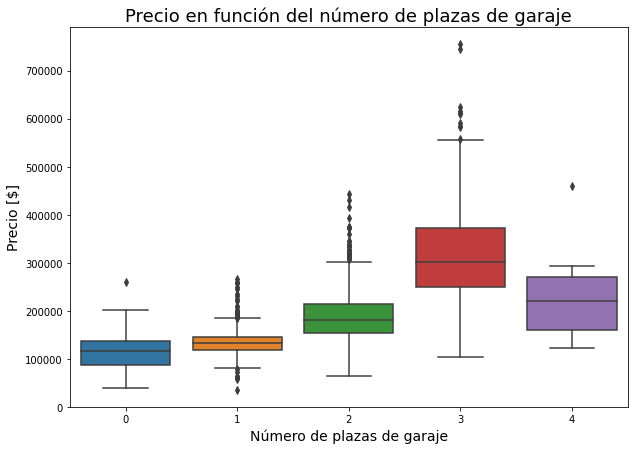

In [ ]:
plt.figure(figsize = (10, 7))

sns.boxplot(precio_garajes.map(lambda x: x[0]).collect(), precio_garajes.map(lambda x: x[1]).collect())
plt.title('Precio en función del número de plazas de garaje', size = 18)
plt.ylabel('Precio [$]', size = 14)
plt.xlabel('Número de plazas de garaje', size = 14);

Recuperamos el resultado de que el precio va en aumento como consecuencia del aumento del número de plazas de garaje, hasta que llegamos a 4 plazas de garaje, donde disminuye. No obstante, como comentaba anteriormente, el resultado de 4 plazas de garaje no podemos tomarlo como "una verdad absoluta", pues el número de observaciones que tenemos es muy reducido en comparación con el resto, por lo que no es un caso representativo de lo que pueda ser la realidad. La solución a eto es considerar, como en la pregunta 9, 1, 2 y 3+ plazas de garaje, de manera que estaríamos "salvando" el problema de las pocas observaciones de viviendas con 4 plazas de garaje. 

Calculando explícitamente el valor de la matriz de correlación entre ambas variables (tomado de uno de los archivos subidos de prácticas en clase), obtendremos que los datos, efectivamente, están altamente correlacionados:

In [ ]:
from pyspark.mllib.stat import Statistics 

correlation_matrix = Statistics.corr(precio_garajes, method="spearman")
correlation_matrix[1][0]

In [ ]:
correlation_matrix[1][0]

0.7035835904798223


En definitiva, el precio de las viviendas __sí__ parece tener una dependencia con el número de plazas de garaje en el sentido de que: __a mayor número de plazas, mayor precio de la vivienda.__

## __Complementaria 2.- Las 10 viviendas con mejores servicios y mejor precio.__

Vuelvo a tomar los datos que he cargado al inicio de la práctica pues, en este apartado, voy a utilizar muchas más variables de las consideradas en el resto de la práctica. Elimino la cabecera y parseo por ; y comienzo el apartado:

In [114]:
cabecera = raw_data_1.first()
cabecera_paralellize = sc.parallelize([cabecera])
complementario = raw_data_1.subtract(cabecera_paralellize)

In [115]:
complementario = complementario.map(lambda x: x.split(';'))

In [153]:
complementario_categ = complementario.map(lambda x: ((int(x[0]), (x[10], x[11], x[13], x[14], x[19], x[23], x[25]))))

En mi opinión, las viviendas con mejores servicios serán aquellas que presenten un mayor número de cualidades "Excelentes" o "Buenas" y, una vez consideradas esos datos, calcular el número de habitaciones, baños, etc., para cada una de ellas.

Para saber cuáles son las viviendas con mejores servicios, lo que haré será filtrar aquellos servicios excelentes en aquellas categorías en las que sea posible. En mi caso, consideraré las siguientes variables:

+ Calidad de revestimiento exterior,

+ Estado del sótano,

+ Calidad de la calefacción,

+ Aire acondicionado incorporado,

+ Calidad de la cocina,

+ Estado del garaje,

+ Piscina.

Mi forma de proceder será la siguiente: trataré de hacer un filtro para establecer cuáles son las viviendas con un mayor número de características en estado "Excelente" o "Bueno", presencia de aire y/o piscina. Con el "problema" que me topé fue que no había calidades excelentes y buenas en todas esas columnas. Por ello, prescindiré de las cualidades "excelente" y "buena" del garaje, pues si selecciono esas, no obtengo ningún valor para las otras. Considero más importantes unas altas cualidades en el resto de variables que en el garaje (mucho más importante que la calefacción sea buena a que el garaje esté impoluto). En mi caso, consideraré que un nivel "TA" (medio) del estado del garaje es más que aceptable como contribución al resto de características y cualidades.

Las viviendas con mejores cualidades en revestimiento exterior, sótano, calefacción y cocina son: 

In [166]:
complementario_categ.filter(lambda x: (x[1][0] == 'Ex'  or x[1][0] == 'Gd') and (x[1][1] == 'Ex' or x[1][1] == 'Gd') and (x[1][2] == 'Ex' or x[1][2] == 'Gd') and (x[1][4] == 'Ex' or x[1][4]=='Gd')).\
                     sortBy(lambda x: x[1]).collect()

[(1184, ('Ex', 'Ex', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (2391, ('Ex', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (575, ('Ex', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (2334, ('Ex', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (2383, ('Ex', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (1778, ('Ex', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (1200, ('Ex', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (296, ('Ex', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (2409, ('Ex', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (2517, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (2429, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (441, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (1018, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (1012, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (2408, ('Gd', 'Gd', 'Ex', 'Y', 'Ex', 'TA', 'Sp')),
 (1808, ('Gd', 'Gd', 'Ex', 'Y', 'Gd', 'Sg', 'Sp')),
 (545, ('Gd', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (547, ('Gd', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (1642, ('Gd', 'Gd', 'Ex', 'Y', 'Gd', 'TA', 'Sp')),
 (1838, ('Gd', 'G

Todas las filtradas presentan aire acondicionado, que es un plus muy convincente, pero ninguna de ellas presenta piscina. 

Vemos que la vivienda con identificador 1184 es la que presenta un mayor número de características "Excelentes", particularmente en todas aquellas consideradas con la posibilidad de alcanzar esa cualidad de excelencia. Tiene aire acondicionado y un estado del garaje aceptable.

El precio de esa vivienda es de:

In [173]:
print("El precio de la vivienda con un mayor número de cualidades excelentes es de:", complementario.filter(lambda x: int(x[0]) == 1184).map(lambda x: float(x[-1])).collect(), "$")

El precio de la vivienda con un mayor número de cualidades excelentes es de: [290000.0] $


Las 5 siguientes presentan unas condiciones excelentes en calidad de revestimiento exterior, calefacción y cocina, y bueno en sótano. Estas son también muy buenas opciones puesto que solo presentan una cualidad no excelente en estado del sótano, que, bajo mi opinión, no es demasiado útil puesto que las características de la vivienda en sí es lo que más se va a utilizar de forma continuada, mientras que el sótano lo usaremos de forma asidua o para otros fines, y con una condición "Buena" es suficiente. 

Los identificadores de estas casas son: 1391, 575, 2334, 2383, 1778. Todas presentan aire acondicionado, un garaje aceptable y no tienen piscina.

Los precios de estas viviendas son: 

In [176]:
print("El precio de la vivienda con identificador 2391 es de:", complementario.filter(lambda x: int(x[0]) == 2391).map(lambda x: float(x[-1])).collect(), "$")
print("El precio de la vivienda con identificador 575 es de:", complementario.filter(lambda x: int(x[0]) == 575).map(lambda x: float(x[-1])).collect(), "$")
print("El precio de la vivienda con identificador 2334 es de:", complementario.filter(lambda x: int(x[0]) == 2334).map(lambda x: float(x[-1])).collect(), "$")
print("El precio de la vivienda con identificador 2383 es de:", complementario.filter(lambda x: int(x[0]) == 2383).map(lambda x: float(x[-1])).collect(), "$")
print("El precio de la vivienda con identificador 1778 es de:", complementario.filter(lambda x: int(x[0]) == 1778).map(lambda x: float(x[-1])).collect(), "$")

El precio de la vivienda con identificador 2391 es de: [338500.0] $
El precio de la vivienda con identificador 575 es de: [318750.0] $
El precio de la vivienda con identificador 2334 es de: [361919.0] $
El precio de la vivienda con identificador 2383 es de: [465000.0] $
El precio de la vivienda con identificador 1778 es de: [320000.0] $


Tomando las variables: 

+ `Año de reforma`,

+ `Número de baños completos`

+ `Número de dormitorios`

+ `Número de cocinas`

para las 6 casas que he escogido como las "mejores" en cuanto a cualidades de la vivienda, podremos comparar sus características:

In [196]:
complementario.filter(lambda x: int(x[0]) == 1184).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2007', '3', '3', '1', '290000')]

In [195]:
complementario.filter(lambda x: int(x[0]) == 2391).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2006', '2', '3', '1', '338500')]

In [190]:
complementario.filter(lambda x: int(x[0]) == 575).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2008', '2', '2', '1', '318750')]

In [191]:
complementario.filter(lambda x: int(x[0]) == 2334).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2006', '2', '4', '1', '361919')]

In [192]:
complementario.filter(lambda x: int(x[0]) == 2383).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2006', '2', '2', '1', '465000')]

In [193]:
complementario.filter(lambda x: int(x[0]) == 1778).map(lambda x: (x[8], x[15], x[17], x[18], x[-1])).collect()

[('2006', '2', '3', '1', '320000')]

Visto esto, la mejor casa, sin duda, en base a las características de cualidades excelentes, aire acondicionado, año de reforma, número de baños, de dormitorios y de cocinas es la vivienda 1184, pues cuesta aproximadamente un 15% menos que las otras consideradas, teniendo incluso mejores características, más dormitorios y más baños. 

Al contrario, la menos rentable en este caso sería la del indicador 2383, pues presenta características ligeramente peores, menor númeor de dormitorio y baños y es la más cara.